In [43]:
import numpy as np
import pandas as pd
import os
import time
import re
import random

import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, classification_report,f1_score

from functools import partial

%matplotlib inline

# Genetic Algorithm

In [44]:
# from generate_population import PopulationGenerator
#random.seed( 10 )
stop_words = stopwords.words('english')
startProgram = time.time()
def process_text(text):
    text = text.encode('ascii', errors='ignore').decode()
    text = text.lower()
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'#+?!', ' ', text)
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    text = re.sub(r"([A-Za-z]+)'s", r"\1 is", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"don't", "do not ", text)
    text = re.sub(r"did't", "did not ", text)
    text = re.sub(r"shouldn't", "should not ", text)
    text = re.sub(r"wouldn't", "would not ", text)
    text = re.sub(r"hadn't", "had not ", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"won't", "will not ", text)
    text = re.sub(r"isn't", "is not ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"dont", " do not", text)
    text = re.sub(r"didnt", " did not", text)
    text = re.sub(r"wont", " will not", text)
    text = re.sub(r"cant", " can not", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\r\n', ' ', text)
    text = re.sub(r'\r\t', ' ', text)
    
    text = re.sub(r'[-_+!?.]+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    #print(text)
    return text

In [45]:
def remove_stopwords(tokens):
    res = []
    for token in tokens:
        if token not in stop_words:
            res.append(token)
    return res

def lemmatize(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_list = []
    for token in tokens:
        lemma = lemmatizer.lemmatize(token, 'v')
        if lemma == token:
            lemma = lemmatizer.lemmatize(token)
        lemma_list.append(lemma)
    # return [ lemmatizer.lemmatize(token, 'v') for token in tokens ]
    return lemma_list

def stemmer(tokens):
    stemmer = nltk.stem.PorterStemmer()
    stemmer_list = []
    for token in tokens:
        stemmed = stemmer.stem(token)
        stemmer_list.append(stemmed)
    return stemmer_list

def process_all(tokens):
    res = remove_stopwords(tokens)
    return stemmer(res)

In [46]:
def get_fitness(population, features):
    vals = []
    func_start = time.time()
    population = np.array(population)
    for i, ind in enumerate(population):
        ind_start = time.time()
        indices = np.where(ind == 1)[0]
        # mat = features * ind
        #s = np.sum(val, axis=0)t
        # vals.append(np.sum(mat))
        vals.append(features[:, indices].sum())
        print("Time taken for population :: {} -> ".format(time.time() - ind_start))
        print('-'*30)
    print(time.time() - func_start)
    return vals

In [47]:
def select_population(percentage_zip):
    minimum_value = []
    percentage_zip = np.array(percentage_zip)
    max = percentage_zip[:, 1].sum()
    pick = random.uniform(0, max)
    current = 0
    # Selecting the parents for i in range(len(percentage_zip)):
    for i in range(len(percentage_zip)):
        current = current + percentage_zip[i][1]
        if current > pick:
            return percentage_zip[i]

def crossover(parent1, parent2): #Two_point_crossover 
    child1_gene = parent1
    child2_gene = parent2
    length_parent1 = len(parent1) - 1
    length_parent2 = len(parent2) - 1
    randomNum = random.random()
    if (randomNum < Pc):
#         print("CrossOver is Done")
        print("CrossOver is Done")
        # Take Index Before random_parent1_index and subtract the latter value for child 1
        size = min(len(parent1), len(parent2))
        cxpoint1 = random.randint(1, size-1)
        cxpoint2 = random.randint(1, size-2)
        if  cxpoint2 >= cxpoint1:
            cxpoint2 += 1
        else: # Swap the two cx points
            cxpoint1+=1
            cxpoint1, cxpoint2 = cxpoint2, cxpoint1

        child1_gene[cxpoint1:cxpoint2], child2_gene[cxpoint1:cxpoint2] = parent2[cxpoint1:cxpoint2], parent1[cxpoint1:cxpoint2]

    else:
        print("greater than probability")
        return parent1, parent2

    return child1_gene, child2_gene


'''
def crossover(parent1, parent2):#Uniform_Crossover
    child1_gene = parent1
    child2_gene = parent2
    indpb=0.5
    randomNum = random.random()
    if (randomNum < Pc):
        print("CrossOver is Done")
        
        size = min(len(parent1), len(parent2))
        for i in range(size):
            if random.random() < indpb:
                child1_gene[i], child2_gene[i] = parent2[i], parent1[i]

    else:
        print("greater than probability")
        return parent1, parent2

    return child1_gene, child2_gene

'''
'''
def crossover(parent1, parent2): #one_point_Crossover
    child1_gene = []
    child2_gene = []
    length_parent1 = len(parent1) - 1
    length_parent2 = len(parent2) - 1
    randomNum = random.random()
    if (randomNum < Pc):
        print("CrossOver is Done")
        # Take Index Before random_parent1_index and subtract the latter value for child 1
        random_parent1_index = 1 + int(random.random() * length_parent1)

        child1_gene = parent1[0:random_parent1_index] + parent2[random_parent1_index:]
        child2_gene = parent2[0:random_parent1_index] + parent1[random_parent1_index:]
    else:
        print("greater than probability")
        return parent1, parent2

    return child1_gene, child2_gene

'''

In [48]:
def mutation(child_chromosome):
    randomNum = random.random()
    rand_rate = random.randint(0, len(child_chromosome) - 1)
    Number_Mutation_gean=0
    previous_value =[]
    #print("child_chromosome Before:",child_chromosome)
    if randomNum < Pm:
        #print("***************8child_chromosome Operation")
        while True:
             now=rand_rate
             if(now not in previous_value):
                 Number_Mutation_gean=Number_Mutation_gean+1
                 child_chromosome[rand_rate] = int(not child_chromosome[rand_rate])
             rand_rate = random.randint(0, len(child_chromosome) - 1)       
             previous_value.append(now)
             if(Number_Mutation_gean==20):
                #print("child_chromosome After:",child_chromosome)
                break
    
    return child_chromosome

In [49]:
def replace_worst_fitness(population,  worst_fitness_values_previous,best_fitness_population):
    # # Removing the worst binary values to the population
#     population.remove(worst_fitness_value1)
#     population.remove(worst_fitness_value2)
#     print(len(worst_fitness_values))
#     print(len(mutated_chromosomes))
    for i in worst_fitness_values_previous:
        population.remove(i)
       
    for i in best_fitness_population:
        population.append(i)
    # # Adding the breeded binary values to the population
#     population.append(mutated_child1_chromosome)
#     population.append(mutated_child2_chromosome)
#     for i in mutated_chromosomes:
#         if i not in population:
#             population.append(i)
    return population


In [50]:
# Creating Population
# def generate_population(population_size, vocab_size): #Any_NumberofFeatuers
#     return np.random.choice([0, 1], size=(population_size, vocab_size)).tolist()

def generate_population(population_size):#With_NumberofFeatuers
    pop = []
    for i in range(population_size):
        OneChromosome = [1]*1504 + 6016*[0]
        random.shuffle(OneChromosome)
        pop.append(OneChromosome)
    return pop

In [51]:
# # How much generation do you want to go?
# # # Number of documents

ng20 = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

categories = ng20.target_names
n=500
classes = 20 
#data_each_100 = []
#filename_each_100 = []
#for i in range(len(categories)):
    # print(categories[i])
    #temp_list = [categories[i]]
    # print(temp_list)
    #temp = fetch_20newsgroups(subset='all', categories=temp_list)
    #temp_data = temp.data[:20]
    #temp_filename = temp.filenames[:20]
    #data_each_100.append(temp_data)
    #filename_each_100.append(temp_filename)
    
#final_list_data = []
#final_filename_list = []
#for i in range(20):
    #for j in range(20):
        #final_list_data.append(data_each_100[i][j])
        #final_filename_list.append(filename_each_100[i][j])
#docs = final_list_data
#docs = n20.
#filenames = final_filename_list
docs = ng20.data[:n]

filenames = ng20.filenames[:n]
print('-'*30)

data_titles = pd.DataFrame({'title': docs})
data_titles.count()

datafile_path = pd.DataFrame({'filepath': filenames})
datafile_path.count()

data = pd.concat([data_titles, datafile_path], axis=1)
data = pd.DataFrame(data['title']).dropna()

data['title'] = data['title'].apply(process_text)
data['title'] = data['title'].apply(lambda x: ' '.join(process_all(x.split())))

print('preprocessing done....')

data_raw = data['title']

# Getting the fitness Score via TFIDF
vectorizer = TfidfVectorizer(stop_words='english')
#vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english',max_features=5))
features = vectorizer.fit_transform(data_raw)
vocab = vectorizer.get_feature_names()
num_features = len(vocab)
#population_size = features.shape[0]
population_size = 50
# Config
# # Ps = Roulette Method
Pc = 0.9  # Probability of Crossover
Pm = 0.1  # Probability of Mutation (0-1)
num_generation =100
# num_core = 4


print("Generating initial population and scores")

start = time.time()
# pop_generator = PopulationGenerator(population_size, features.toarray(), num_core)
# pop_generator.start()
# pop_generator.join_processes()

# scores = np.frombuffer(pop_generator.scores.get_obj())
# population = pop_generator.population
population = generate_population(population_size)#with_anyNumberofFeatuers
print(len(population))
scores = get_fitness(population, features.toarray())

print("Time taken for generating initial population config :: {},{} --> {}".format(population_size, num_features, time.time()-start))
fitness_function = []
averages = []
prev_val = 0
count_avg=0
print("Runnig GE...")
for i in range(num_generation):
    gen_time_tracker = time.time()
   
    # Sorting the Zipped Populations
    zipped_population = list(zip(population, scores))
    zipped_population.sort(key=lambda t: t[1], reverse=True)
    print("Generation :: {}".format(i),"High FF is:",zipped_population[0][1])
    #avg_fit = sum(v[1] for v in zipped_population) / len(zipped_population)
    avg_fit =zipped_population[0][1]
    print("Average_fit",avg_fit)
    if(avg_fit <= prev_val)or(avg_fit > prev_val) :
        print("Enter IF")
        if(avg_fit == prev_val):
            count_avg=count_avg+1
            print("Average_fit",avg_fit,"count_avg",count_avg)
            if(count_avg==10):
                print("Stopping...",count_avg)
                break
        else:
            count_avg=0
    prev_val = avg_fit
    averages.append(avg_fit)
    #if(avg_fit < prev_val):

#         count_avg=count_avg+1
#         if(count_avg<11):
#             print("Stopping...")
#             break
#     prev_val = avg_fit
#     averages.append(avg_fit)
   
    
    print("Selecting Parents ...")
#     print('zipped pop')
#     print(zipped_population)
    chromosomes = []
    print("Doing Crossover ...") 
    for i in range(5):
        father = select_population(zipped_population)
#         zipped_population.remove(tuple(father))
        mother = select_population(zipped_population)
#         print('father')
#         print(father)
#         print('mother')
#         print(mother)
                   
        child1_chromosome, child2_chromosome = crossover(father[0], mother[0])
        chromosomes.extend([child1_chromosome, child2_chromosome])
#         zipped_population.remove(tuple(mother))
        print('done '+str(i))

    
    # print("Mutation...")
    print("Doing Mutation ...")
    mutated_chromosomes = []
    for chromo in chromosomes:
        mutated_chromosomes.append(mutation(chromo))
    
    # Replace Worst Parent (via Fitness Function) with new Mutated Child on Main Data
    # Getting the Worst Value
    print('Replacing Population with Worst Fitness ...')
    #get fitness function of new child
#     print("length of mutated chromosomes"+len(mutated_chromosomes))
    scores_new_mutated_child_population = get_fitness(mutated_chromosomes,features.toarray())
    
    zipped_new_mutated_child_population = list(zip(mutated_chromosomes, scores_new_mutated_child_population))
    
    zipped_worst_fitness_values_previous = [zipped_population[-i-1] for i in range(10)]
#     worst_fitness_value1 = zipped_population[-1][0]
#     worst_fitness_value2 = zipped_population[-2][0]

    
    #appending generated and previous worst from population
    zipped_new_mutated_child_population.extend(zipped_worst_fitness_values_previous)
    #sorting on descending order
    zipped_new_mutated_child_population.sort(key=lambda t: t[1], reverse=True)
    # Getting Best 10 fitness from appended 
    best_fitness_population = [zipped_new_mutated_child_population[i][0] for i in range(10)]
    #select only chromosomes to compare in population during removing items 
    worst_fitness_values_previous= [zipped_worst_fitness_values_previous[i][0] for i in range(10)]
    
    population, scores = zip(*zipped_population)
    population = list(population)
    scores = list(scores)
#     population = replace_worst_fitness(population, worst_fitness_value1, worst_fitness_value2,
#                                        mutated_child1_chromosome, mutated_child2_chromosome)
    
    population = replace_worst_fitness(population, worst_fitness_values_previous,best_fitness_population)

    scores[-10:] = get_fitness(population[-10:], features.toarray())
#     print(scores)
    print("Time taken :: {}".format(time.time() - gen_time_tracker))


print('Genetic Done')
zipped_population.sort(key=lambda t: t[1], reverse=True)
top_population = population[np.argmax(scores)]
High_FF=zipped_population[0][1]
#print (zipped_population)
print ("Top_population",top_population)
print ("Highest GA FF ",High_FF)
print("Prossing Time :: {}".format(time.time() - startProgram ))

# origin_path = "/home/ashis/ML/projects/Naif/code/naif/gasfla/pickles/"
# joblib.dump(filenames, origin_path+'ga/filenames.pkl')
# joblib.dump(vectorizer, origin_path+'ga/vectorizer.pkl')
# joblib.dump(features, origin_path+'ga/features_sparse.pkl')
# joblib.dump(top_population, origin_path+'ga/population_best.pkl')

------------------------------
preprocessing done....
Generating initial population and scores
50
Time taken for population :: 0.025999069213867188 -> 
------------------------------
Time taken for population :: 0.015999794006347656 -> 
------------------------------
Time taken for population :: 0.019001483917236328 -> 
------------------------------
Time taken for population :: 0.01600480079650879 -> 
------------------------------
Time taken for population :: 0.014999866485595703 -> 
------------------------------
Time taken for population :: 0.015999555587768555 -> 
------------------------------
Time taken for population :: 0.017998218536376953 -> 
------------------------------
Time taken for population :: 0.015999317169189453 -> 
------------------------------
Time taken for population :: 0.014998912811279297 -> 
------------------------------
Time taken for population :: 0.02001810073852539 -> 
------------------------------
Time taken for population :: 0.022999048233032227 -> 


CrossOver is Done
done 0
CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
greater than probability
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.035004377365112305 -> 
------------------------------
Time taken for population :: 0.022992372512817383 -> 
------------------------------
Time taken for population :: 0.024006128311157227 -> 
------------------------------
Time taken for population :: 0.015005826950073242 -> 
------------------------------
Time taken for population :: 0.0200040340423584 -> 
------------------------------
Time taken for population :: 0.01500248908996582 -> 
------------------------------
Time taken for population :: 0.02799677848815918 -> 
------------------------------
Time taken for population :: 0.016000747680664062 -> 
------------------------------
Time taken for population :: 0.03400063514709473 -> 
------------------------------
Time taken for population :: 0.02100205421447

Time taken :: 0.9250001907348633
Generation :: 6 High FF is: 572.6987543441401
Average_fit 572.6987543441401
Enter IF
Average_fit 572.6987543441401 count_avg 1
Selecting Parents ...
Doing Crossover ...
CrossOver is Done
done 0
CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.0240020751953125 -> 
------------------------------
Time taken for population :: 0.020999670028686523 -> 
------------------------------
Time taken for population :: 0.028994321823120117 -> 
------------------------------
Time taken for population :: 0.019997596740722656 -> 
------------------------------
Time taken for population :: 0.01700139045715332 -> 
------------------------------
Time taken for population :: 0.01900029182434082 -> 
------------------------------
Time taken for population :: 0.01800084114074707 -> 
------------------------------
Time taken for popul

CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.018002748489379883 -> 
------------------------------
Time taken for population :: 0.014001607894897461 -> 
------------------------------
Time taken for population :: 0.015000581741333008 -> 
------------------------------
Time taken for population :: 0.014998912811279297 -> 
------------------------------
Time taken for population :: 0.01600050926208496 -> 
------------------------------
Time taken for population :: 0.01599597930908203 -> 
------------------------------
Time taken for population :: 0.016002416610717773 -> 
------------------------------
Time taken for population :: 0.01702117919921875 -> 
------------------------------
Time taken for population :: 0.01598048210144043 -> 
------------------------------
Time taken for population :: 0.01599717140197754 -> 
-----------------------

CrossOver is Done
done 0
CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.023000717163085938 -> 
------------------------------
Time taken for population :: 0.015998125076293945 -> 
------------------------------
Time taken for population :: 0.016002893447875977 -> 
------------------------------
Time taken for population :: 0.016004323959350586 -> 
------------------------------
Time taken for population :: 0.017996549606323242 -> 
------------------------------
Time taken for population :: 0.016001462936401367 -> 
------------------------------
Time taken for population :: 0.0169985294342041 -> 
------------------------------
Time taken for population :: 0.018001079559326172 -> 
------------------------------
Time taken for population :: 0.016001224517822266 -> 
------------------------------
Time taken for population :: 0.017002105712890625

CrossOver is Done
done 0
CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.01899862289428711 -> 
------------------------------
Time taken for population :: 0.0169985294342041 -> 
------------------------------
Time taken for population :: 0.024001598358154297 -> 
------------------------------
Time taken for population :: 0.016000747680664062 -> 
------------------------------
Time taken for population :: 0.015996694564819336 -> 
------------------------------
Time taken for population :: 0.01900339126586914 -> 
------------------------------
Time taken for population :: 0.016998767852783203 -> 
------------------------------
Time taken for population :: 0.019997119903564453 -> 
------------------------------
Time taken for population :: 0.015999317169189453 -> 
------------------------------
Time taken for population :: 0.02199721336364746 ->

Time taken :: 1.0320079326629639
Generation :: 22 High FF is: 604.2125647698483
Average_fit 604.2125647698483
Enter IF
Average_fit 604.2125647698483 count_avg 4
Selecting Parents ...
Doing Crossover ...
CrossOver is Done
done 0
CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.023005247116088867 -> 
------------------------------
Time taken for population :: 0.027996301651000977 -> 
------------------------------
Time taken for population :: 0.02800440788269043 -> 
------------------------------
Time taken for population :: 0.01600337028503418 -> 
------------------------------
Time taken for population :: 0.02300262451171875 -> 
------------------------------
Time taken for population :: 0.01999974250793457 -> 
------------------------------
Time taken for population :: 0.03299975395202637 -> 
------------------------------
Time taken for popu

greater than probability
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.020003080368041992 -> 
------------------------------
Time taken for population :: 0.015999794006347656 -> 
------------------------------
Time taken for population :: 0.017000436782836914 -> 
------------------------------
Time taken for population :: 0.015996932983398438 -> 
------------------------------
Time taken for population :: 0.01699542999267578 -> 
------------------------------
Time taken for population :: 0.01700305938720703 -> 
------------------------------
Time taken for population :: 0.019995927810668945 -> 
------------------------------
Time taken for population :: 0.015000343322753906 -> 
------------------------------
Time taken for population :: 0.028003215789794922 -> 
------------------------------
Time taken for population :: 0.017000913619995117 -> 
-------------

Time taken for population :: 0.017000198364257812 -> 
------------------------------
0.25899791717529297
Time taken :: 0.9449942111968994
Generation :: 30 High FF is: 609.586105212166
Average_fit 609.586105212166
Enter IF
Average_fit 609.586105212166 count_avg 4
Selecting Parents ...
Doing Crossover ...
CrossOver is Done
done 0
CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.019999027252197266 -> 
------------------------------
Time taken for population :: 0.015001773834228516 -> 
------------------------------
Time taken for population :: 0.024994850158691406 -> 
------------------------------
Time taken for population :: 0.017004966735839844 -> 
------------------------------
Time taken for population :: 0.0189974308013916 -> 
------------------------------
Time taken for population :: 0.015996932983398438 -> 
------------------------------

CrossOver is Done
done 0
CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
greater than probability
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.03900504112243652 -> 
------------------------------
Time taken for population :: 0.022999286651611328 -> 
------------------------------
Time taken for population :: 0.01699972152709961 -> 
------------------------------
Time taken for population :: 0.01600050926208496 -> 
------------------------------
Time taken for population :: 0.012998580932617188 -> 
------------------------------
Time taken for population :: 0.014997482299804688 -> 
------------------------------
Time taken for population :: 0.020998477935791016 -> 
------------------------------
Time taken for population :: 0.026002168655395508 -> 
------------------------------
Time taken for population :: 0.022997617721557617 -> 
------------------------------
Time taken for population :: 0.019999504089

CrossOver is Done
done 0
CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.024000883102416992 -> 
------------------------------
Time taken for population :: 0.018001794815063477 -> 
------------------------------
Time taken for population :: 0.016001224517822266 -> 
------------------------------
Time taken for population :: 0.01899886131286621 -> 
------------------------------
Time taken for population :: 0.018996477127075195 -> 
------------------------------
Time taken for population :: 0.019999980926513672 -> 
------------------------------
Time taken for population :: 0.020003795623779297 -> 
------------------------------
Time taken for population :: 0.018999099731445312 -> 
------------------------------
Time taken for population :: 0.01799941062927246 -> 
------------------------------
Time taken for population :: 0.020993471145629883

CrossOver is Done
done 1
CrossOver is Done
done 2
CrossOver is Done
done 3
CrossOver is Done
done 4
Doing Mutation ...
Replacing Population with Worst Fitness ...
Time taken for population :: 0.025994062423706055 -> 
------------------------------
Time taken for population :: 0.018991708755493164 -> 
------------------------------
Time taken for population :: 0.016998767852783203 -> 
------------------------------
Time taken for population :: 0.017998218536376953 -> 
------------------------------
Time taken for population :: 0.01599860191345215 -> 
------------------------------
Time taken for population :: 0.016995906829833984 -> 
------------------------------
Time taken for population :: 0.017005205154418945 -> 
------------------------------
Time taken for population :: 0.016002655029296875 -> 
------------------------------
Time taken for population :: 0.0209963321685791 -> 
------------------------------
Time taken for population :: 0.018000364303588867 -> 
---------------------

Top_population [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 

In [52]:
len(population)

50

In [53]:
len(top_population)

7520

In [54]:
# select features
features_ga = top_population * features.toarray()

In [55]:
from sklearn.cluster import KMeans

In [56]:
number_of_clusters = 20

In [57]:
model = KMeans(n_clusters=number_of_clusters, n_jobs=8)
model.fit(features_ga)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=8, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
prediction_labels = model.labels_
scores = model.score(features_ga)
centers = model.cluster_centers_

In [59]:
centers

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00010697, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [60]:
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [61]:
categories = list(map(lambda x: x.split('\\')[-2], filenames))
len(categories)

500

In [62]:
from sklearn.decomposition import PCA, TruncatedSVD

plt.rcParams['figure.figsize'] = (15, 10)

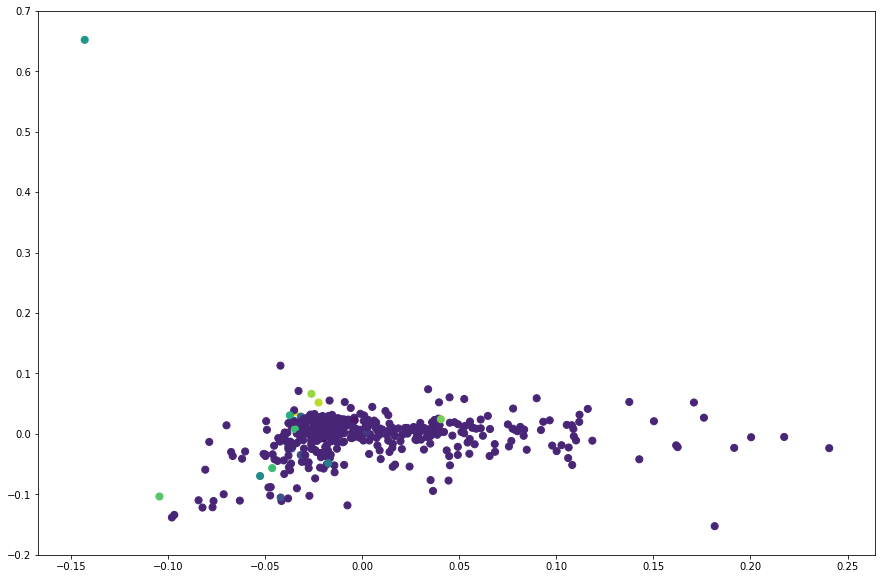

In [63]:
pca = PCA(n_components=2)
x2d = pca.fit_transform(features_ga)
plt.scatter(x2d[..., 0], x2d[..., 1], c=prediction_labels, s=50)

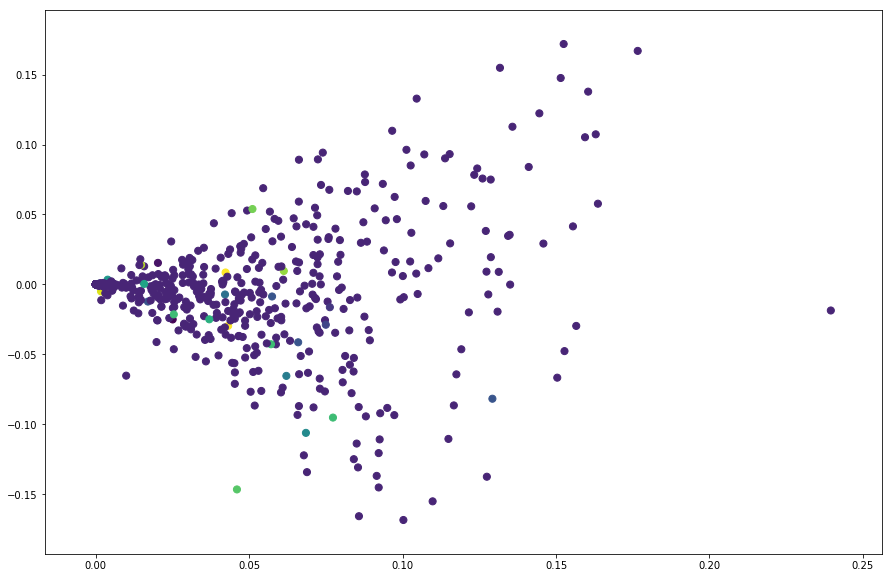

In [64]:
svd = TruncatedSVD(n_components=2)
x2d = svd.fit_transform(features_ga)
plt.scatter(x2d[..., 0], x2d[..., 1], c=prediction_labels, s=50)

In [65]:
def calculate_cosine_similarity(v1, v2):
    mag = lambda x : np.linalg.norm(x)
    return np.dot(v1, v2) / (mag(v1) * mag(v2))

In [66]:
used_centres = []
used_dids = []
result = []
cluster_label_map = {}
for cidx, centre in enumerate(centers):
    sim = -1
    cid = cidx
    did = 0
    for doc_id, feature in enumerate(features_ga):
        s = calculate_cosine_similarity(centre, feature)
        if categories[doc_id] in used_dids:
            continue
        if s > sim:
            sim, cid, did = s, cidx, doc_id
    result.append((cid, did, sim, categories[did]))
    used_dids.append(categories[did])
    cluster_label_map[cid] = categories[did]

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
cluster_label_map

{0: 'comp.graphics',
 1: 'sci.crypt',
 2: 'comp.windows.x',
 3: 'talk.politics.guns',
 4: 'talk.religion.misc',
 5: 'comp.sys.mac.hardware',
 6: 'sci.med',
 7: 'sci.space',
 8: 'misc.forsale',
 9: 'comp.sys.ibm.pc.hardware',
 10: 'sci.electronics',
 11: 'talk.politics.mideast',
 12: 'rec.motorcycles',
 13: 'comp.os.ms-windows.misc',
 14: 'rec.autos',
 15: 'alt.atheism',
 16: 'soc.religion.christian',
 17: 'rec.sport.hockey',
 18: 'rec.sport.baseball',
 19: 'talk.politics.misc'}

In [68]:
# # Making a dictionary for cluster_map
cluster_label_cidx_map = {}
for key in cluster_label_map:
    cluster_label_cidx_map[cluster_label_map[key]] = key

In [69]:
cluster_label_cidx_map

{'comp.graphics': 0,
 'sci.crypt': 1,
 'comp.windows.x': 2,
 'talk.politics.guns': 3,
 'talk.religion.misc': 4,
 'comp.sys.mac.hardware': 5,
 'sci.med': 6,
 'sci.space': 7,
 'misc.forsale': 8,
 'comp.sys.ibm.pc.hardware': 9,
 'sci.electronics': 10,
 'talk.politics.mideast': 11,
 'rec.motorcycles': 12,
 'comp.os.ms-windows.misc': 13,
 'rec.autos': 14,
 'alt.atheism': 15,
 'soc.religion.christian': 16,
 'rec.sport.hockey': 17,
 'rec.sport.baseball': 18,
 'talk.politics.misc': 19}

In [70]:
def cidx_to_label(cluster_label_map, cidx):
    return cluster_label_map[cidx]

cidx_to_label_p  = partial(cidx_to_label, cluster_label_map)

In [71]:
prediction_categories = list(map(cidx_to_label_p, prediction_labels))

In [72]:
len(prediction_categories)

500

In [73]:
def calculate_metrics(target_label, predicted_label, num_classes=20):
    #n = len(target_label)
    result = {}
    cm = np.zeros((num_classes, num_classes))
    precisions = np.zeros(num_classes)
    recalls = np.zeros(num_classes)
    for t, p in zip(target_label, predicted_label):
        cm[t][p] += 1

    tp = np.diag(cm)
    fn = np.sum(cm, axis=1) - tp
    fp = np.sum(cm, axis=0) - tp

    for i in range(num_classes):
        p_denom = tp[i] + fp[i]
        r_denom = tp[i] + fn[i]
        precisions[i] = 0 if p_denom == 0 else tp[i]/p_denom
        recalls[i] = 0 if r_denom == 0 else tp[i]/r_denom

    return cm, precisions, recalls

In [74]:
target = list(map(lambda x : cluster_label_cidx_map[x], categories))

In [75]:
cm, precisions, recalls = calculate_metrics(target, prediction_labels, num_classes=number_of_clusters)

In [76]:
print(f1_score(target, prediction_labels, average='micro')) 

0.086


In [77]:
print(f1_score(target, prediction_labels, average='macro')) 

0.059696919379997194


In [78]:
print(len(target))

500


In [79]:
print(len(prediction_labels))

500


In [80]:
print("Prossing Time :: {}".format(time.time() - startProgram ))

Prossing Time :: 141.17313289642334
